# 1. Setup

# 1.1 Load Data

In [1]:
library(ggplot2)
library(tidyverse)
options(repr.matrix.max.cols = 100)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
df <- read_csv('UMW_FR_reduced.csv')  %>%
        tbl_df()

df_tags <- read_csv('tags_clean.csv')  %>%
        tbl_df()

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  movie_id = col_double(),
  rights_holder_id = col_double(),
  user_id = col_double(),
  product_type_id = col_double(),
  sale_return_id = col_double(),
  quantity = col_double(),
  amount_received_eur = col_double(),
  royalties_paid_eur = col_double(),
  comission = col_double(),
  bundle_quantity = col_double(),
  movie_metadata_id = col_double(),
  date_id = col_double(),
  date_value = col_date(format = ""),
  user_id.1 = col_double(),
  postal_code = col_double(),
  customer_identifier = col_double(),
  expiry_date = col_date(format = ""),
  comission.1 = col_double(),
  mama_movie_id = col_double()
  # ... with 4 more columns
)
See spec(...) for full column specifications.
Warning message:
"18468 parsing failures.
  row         col               expected actual                 file
 4221 length      no trailing characters      ' 

In [38]:
df

X1,movie_id,rights_holder_id,user_id,product_type_id,sale_return_id,quantity,amount_received_eur,royalties_paid_eur,comission,bundle_quantity,movie_metadata_id,date_id,date_value,user_id.1,business_unit,region,country_name,country_code,postal_code,customer_identifier,source,product_type,video_quality,original_title,local_title,rights_holder_name,expiry_date,comission.1,mama_movie_id,mama_rh_id,provider,title,artists,studio,primary_genre,version.2,cast,genre,crew,production_year,production_company,director,original_language,length,nationality
0,12434,3012,51768,1,1,1,3.99,2.31,20,1,80,1334,2013-08-26,51768,France,Europe,France,FR,93140,6121362368,itunes,VOD,SD,Truth or dare,Action ou Vérité ?,BAC Films,2017-06-15,20,84,3,itunes,Action ou Vérité ?,"Liam Boyle,Jack Gordon,Florence Hall",CORONA PICTURES en association avec AV PICTURES et MET FILM POST,Horror,1,NA,Thriller,NA,2011,NA,Robert Heath,en,NA,GB
1,12440,4810,51774,1,1,1,3.99,1.65,20,1,92,1334,2013-08-26,51774,France,Europe,France,FR,13260,1461429053,itunes,VOD,HD,Li Xiao Long,"Bruce Lee, naissance d'une légende",FIP,2199-12-13,20,98,11,itunes,Bruce Lee : Naissance d'une légende,"???, ???",Masterpiece Films Limited,Drama,1,NA,Drama,NA,2010,NA,NA,yue,NA,HK
2,14939,55662,51779,1,1,1,3.99,1.90,20,1,3058,2116,2015-10-17,51779,France,Europe,France,FR,82200,5067804233,itunes,VOD,HD,Burning Blue,Se Brûler les Ailes,Optimale,2199-12-13,20,32513,626,itunes,Se brûler les ailes,"Trent Ford, Rob Mayes, Morgan Spector","BURNING BLUE THE FILM, LP.",Drama,1,"Morgan Spector, Rob Mayes, Trent Ford",Drama,"D.M.W. Greer, Helene Kvale",2013,"BURNING BLUE THE FILM, LP.",D.M.W. Greer,en,96,US
3,13319,13036,51779,1,1,1,2.99,1.18,20,1,1574,2116,2015-10-17,51779,France,Europe,France,FR,82200,5067804233,itunes,VOD,HD,Alata,CORD,Outplay,2199-12-13,20,1704,139,itunes,Alata,"Nicholas Jacob, Michael Aloni, Jameel Khouri, Alon Pdut",Outplay,Drama,1,"Alon Pdut, Jamil Khoury, Michael Aloni, Nicholas Jacob","Drama, Romance, Foreign","Lihu Roter, Mark Holden, Michael Mayer, Yael Shafrir",2012,Outplay,NA,he,NA,IL
4,12505,11764,51779,1,1,1,2.99,1.18,20,1,1457,2239,2016-02-17,51779,France,Europe,France,FR,82200,5067804233,itunes,VOD,HD,Ausente,Absent,Outplay,2199-12-13,20,1582,139,itunes,Absent,"Rocio Pavón, Javier De Pietro, Carlos Echevarría, Antonella Costa, Alejandro Barbero",Outplay,Drama,1,"Alejandro Barbero, Antonella Costa, Carlos Echevarria, Javier de Pietro, Rocio Pavon","Drama, Romance, Foreign","Marco Berger, Pedro Irusta",2010,Outplay,NA,es-419,NA,AR
5,15412,63352,51779,2,1,1,9.99,5.70,20,1,3548,2239,2016-02-17,51779,France,Europe,France,FR,82200,5067804233,itunes,EST,HD,Snails in the rain,Lettres d'amour d'un inconnu,Optimale,2199-12-13,20,33150,626,itunes,Lettres d'amour d'un inconnu,"Yoav Reuveni, Yehuda Nahari, Yariv Mozer, Moran Rosenblatt",MOZER FILMS,Drama,1,"YEHUDA NAHARI, YOAV REUVENI",Drama,"YARIV MOZER, Yossi Avni Levy",2013,MOZER FILMS,YARIV MOZER,he,82,IL
6,12624,7490,51779,1,1,1,2.99,1.18,20,1,1160,2239,2016-02-17,51779,France,Europe,France,FR,82200,5067804233,itunes,VOD,HD,Yossi,Yossi,Bodega,2199-12-13,20,1277,173,itunes,Yossi,"Oz Zehavi, Orly Silbersatz, Ola Schur Selektar, Ohad Knoller, Lior Ashkenazi",LAMA FILMS -UNITED KING FILMS,Drama,1,NA,Drama,NA,2012,NA,NA,he,NA,IL
7,12485,11756,51779,1,1,1,2.99,1.18,20,1,1456,2241,2016-02-19,51779,France,Europe,France,FR,82200,5067804233,itunes,VOD,HD,Contracorriente,Contracorriente,Outplay,2199-12-13,20,1581,139,itunes,Contracorriente,"Tatiana Astengo, Manolo Cardona, Cristian Mercado",Outplay,Drama,1,"Christian Mercado, Manolo Cardona, Tatiana Astengo","Romance, Foreign, Drama",Javier Fuentes-León,2010,Outplay,NA,es-419,NA,PE
8,12598,7435,51779,2,1,1,7.99,4.55,20,1,1116,2241,2016-02-19,51779,France,Europe,France,FR,82200,5067804233,itunes,EST,HD,House of Boys,House of Boys,Outplay,2199-12-13,20,1233,139,itunes,House of Boys,"Udo Kier, Stephen Fry, Layke Anderson, Eleanor David, Benn Northover",Outplay,Drama,1,"Benn Northover, Eleanor Davi

In [14]:
#Road to death
#left_join(df, df_tags, by = c('mama_movie_id'='id'))

# 1.2 columns of interests
1. royalties_paid_eur
2. date_value
3. postal_code
4. source
5. product_type
6. original_title (joined with imdb data)
7. rights_holder_name
8. mama_movie_id (joined with tags)
9. user_id

# 1.3 What we need
1. the amount of time each given movie has been put on its platform (if by the time the database ends a movie has been just aired for 3 days, we will certainly underestimate the performance of that movie.)

# 2. Meta Data

In [3]:
#na values
summarise_all(df, funs(sum(is.na(.))))

Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
please use list() instead

# Before:
funs(name = f(.)

# After: 
list(name = ~f(.))
This warning is displayed once per session."

X1,movie_id,rights_holder_id,user_id,product_type_id,sale_return_id,quantity,amount_received_eur,royalties_paid_eur,comission,bundle_quantity,movie_metadata_id,date_id,date_value,user_id.1,business_unit,region,country_name,country_code,postal_code,customer_identifier,source,product_type,video_quality,original_title,local_title,rights_holder_name,expiry_date,comission.1,mama_movie_id,mama_rh_id,provider,title,artists,studio,primary_genre,version.2,cast,genre,crew,production_year,production_company,director,original_language,length,nationality
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,318920,336766,36,36,747,36,36,36,747,36,36,7798,0,0,292621,312397,96832,0,345389,2430,345379,195994,394907,183273,2042,460075,2430


In [4]:
#Columns
colnames(df)

#Row numbers
nrow(df)

[1] "X1"                  "movie_id"            "rights_holder_id"   
 [4] "user_id"             "product_type_id"     "sale_return_id"     
 [7] "quantity"            "amount_received_eur" "royalties_paid_eur" 
[10] "comission"           "bundle_quantity"     "movie_metadata_id"  
[13] "date_id"             "date_value"          "user_id.1"          
[16] "business_unit"       "region"              "country_name"       
[19] "country_code"        "postal_code"         "customer_identifier"
[22] "source"              "product_type"        "video_quality"      
[25] "original_title"      "local_title"         "rights_holder_name" 
[28] "expiry_date"         "comission.1"         "mama_movie_id"      
[31] "mama_rh_id"          "provider"            "title"              
[34] "artists"             "studio"              "primary_genre"      
[37] "version.2"           "cast"                "genre"              
[40] "crew"                "production_year"     "production_company" 
[43] "director"            "original_language"   "length"             
[46] "nationality"

[1] 1020167

# 3. EDA - Internal

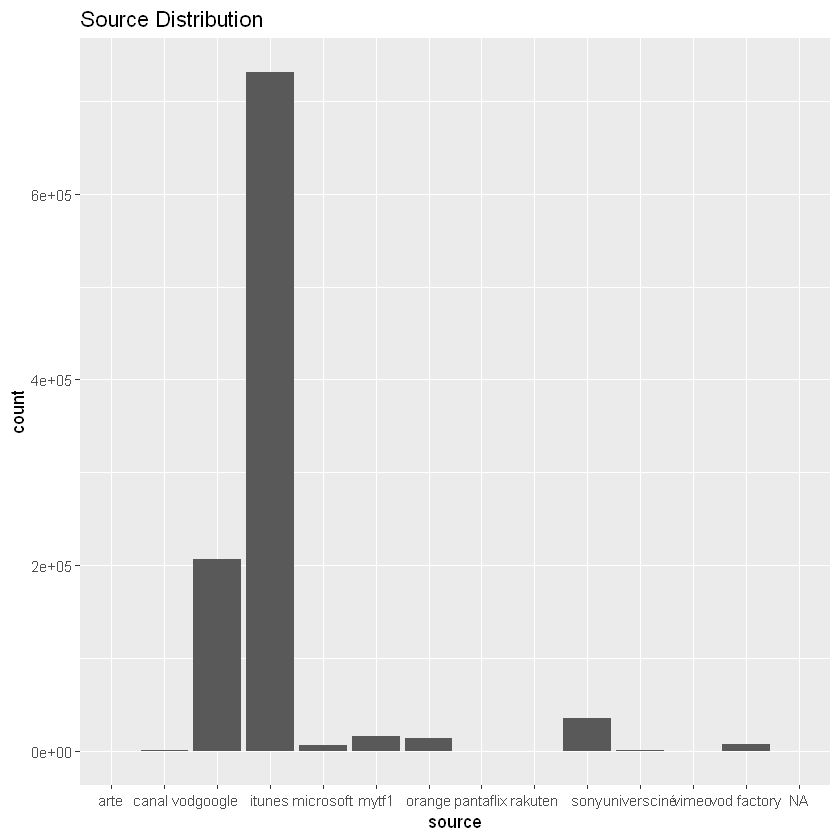

In [54]:
ggplot(df) +
    geom_bar(aes(x=source)) +
    labs(title = 'Source Distribution')

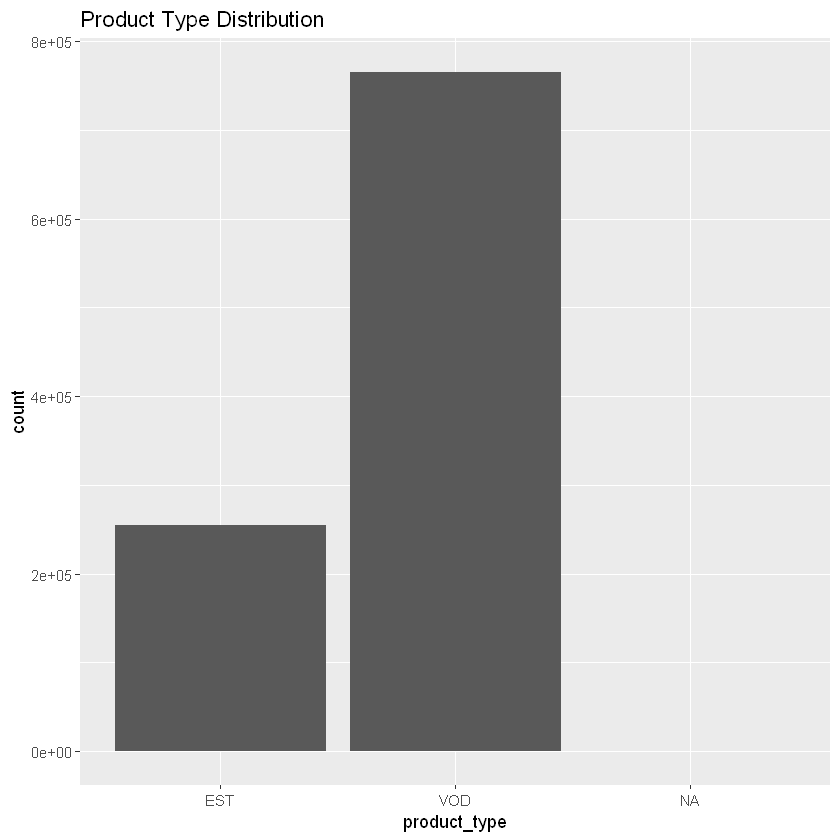

In [56]:
ggplot(df) +
    geom_bar(aes(x=product_type)) +
    labs(title = 'Product Type Distribution')

Warning message:
"Removed 5932 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

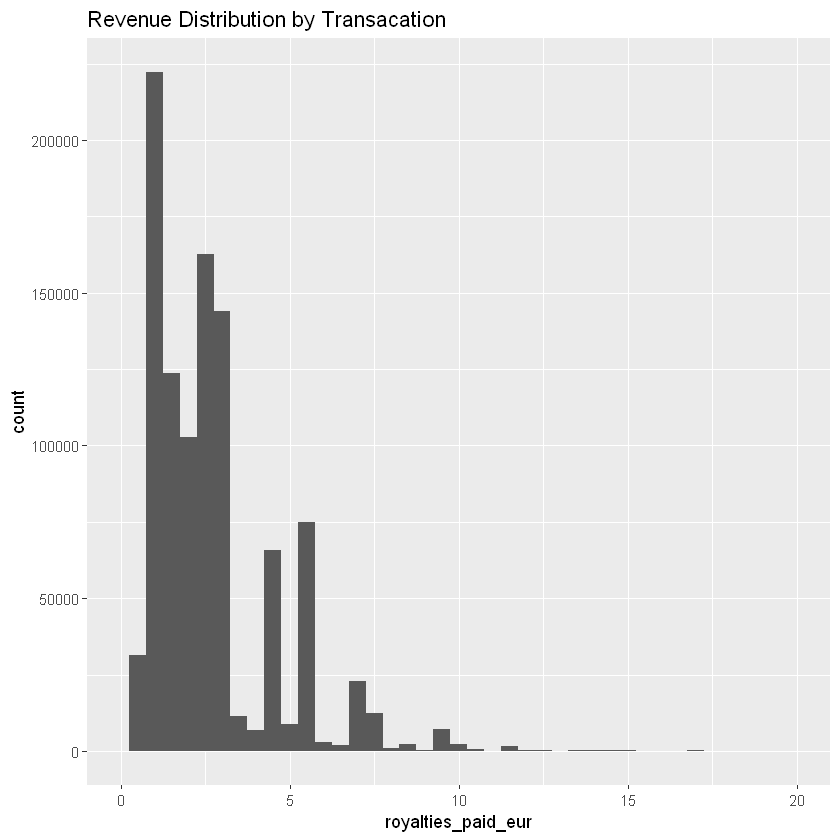

In [19]:
ggplot(df) +
    geom_histogram(aes(x=royalties_paid_eur), binwidth = 0.5) +
    labs(title = 'Revenue Distribution by Transacation') +
    xlim(0, 20)

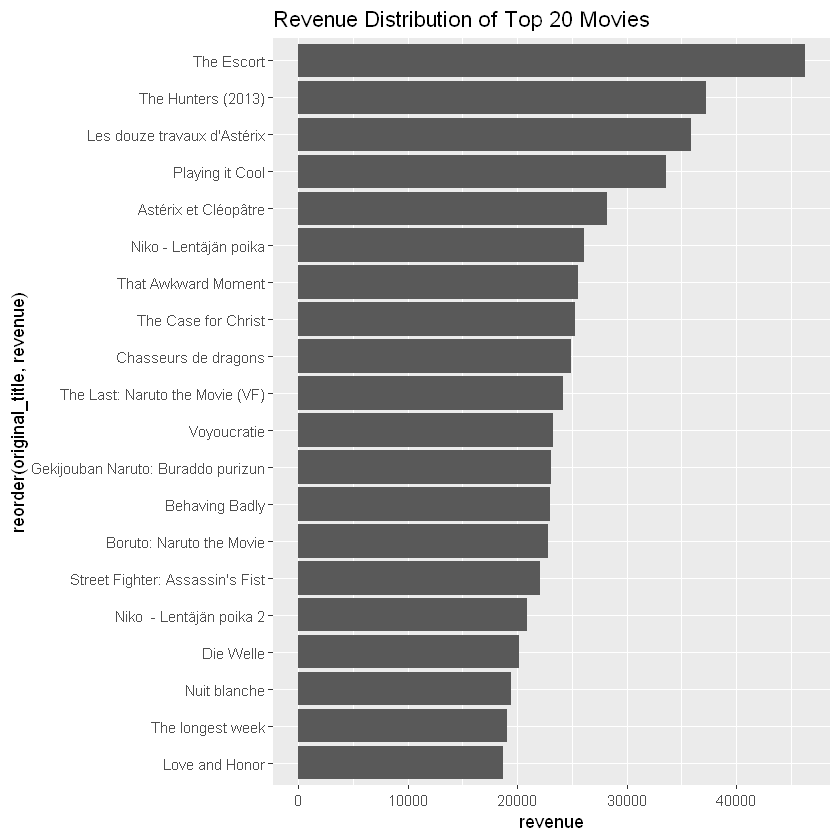

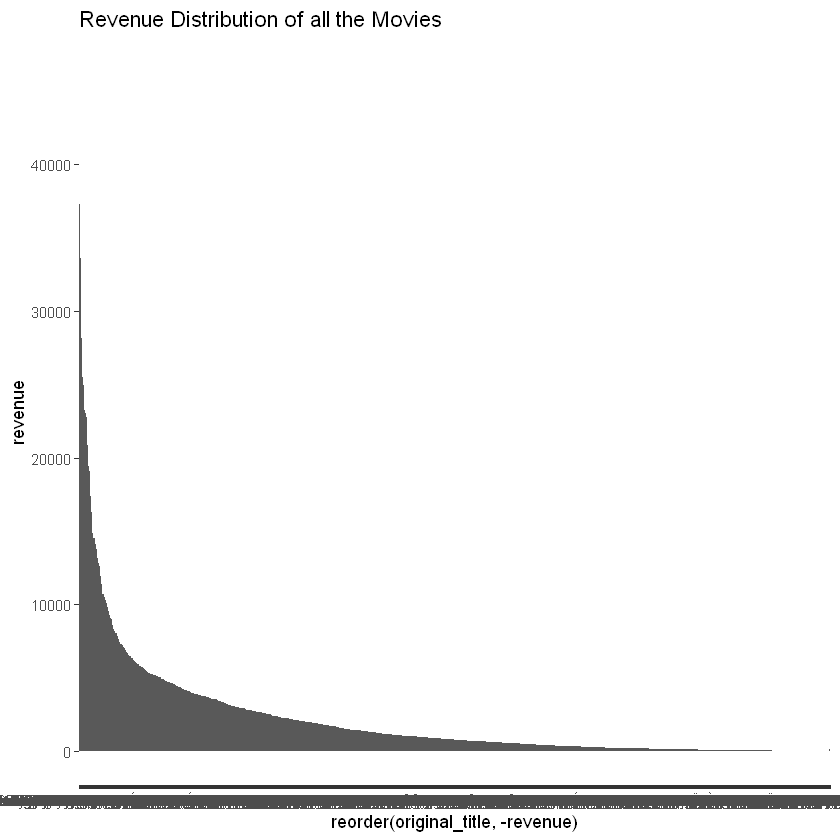

In [53]:
n = 20

temp <- df %>%
        select(original_title, royalties_paid_eur) %>%
        group_by(original_title) %>%
        summarize(revenue = sum(royalties_paid_eur)) %>%
        arrange(-revenue)

ggplot(temp[1:n,]) +
    geom_col(aes(x=reorder(original_title, revenue), y=revenue)) +
    labs(title = paste('Revenue Distribution of Top', n ,'Movies')) +
    coord_flip()

ggplot(temp) +
    geom_col(aes(x=reorder(original_title, -revenue), y=revenue)) +
    labs(title = paste('Revenue Distribution of all the Movies'))